# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

# Введение.  

**Описание проекта**  

    Заказчик этого исследования — Оператор мобильной связи «Мегалайн», который выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра». В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — мы её уже сделали.  

**Цель проекта** 

    Необходимо построить модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.  

**Описание данных**  

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:  

    •	сalls — количество звонков,  
    •	minutes — суммарная длительность звонков в минутах,  
    •	messages — количество sms-сообщений,  
    •	mb_used — израсходованный интернет-трафик в Мб,  
    •	is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).  
 

**План работы**  

    Шаг 1. Откройте файл с данными и изучите его. Путь к файлу: /datasets/users_behavior.csv.  
    Шаг 2. Разделите исходные данные на обучающую, валидационную и тестовую выборки.  
    Шаг 3. Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.  
    Шаг 4: Проверьте качество модели на тестовой выборке.  
    Шаг 5: Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

## Разбейте данные на выборки

In [5]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

In [6]:
features_train, features_test1, target_train, target_test1 = train_test_split(features, target, test_size=0.4, random_state=42, 
                                                                             stratify=target)
features_test, features_valid, target_test, target_valid = train_test_split(features_test1, target_test1, test_size=0.5, 
                                                                            random_state=12345, stratify=target_test1)

In [7]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(1928, 4)
(643, 4)
(643, 4)
(1928,)
(643,)
(643,)


## Исследуйте модели

**Применим модель дерево решений.**

Accuracy лучшей модели: 0.7869362363919129
Лучшая модель: DecisionTreeClassifier(max_depth=4, random_state=12345)



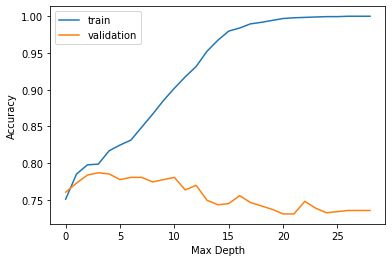

In [8]:
best_model_dt = None
best_result_dt = 0
results_train = []
results_valid = []
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    train_predictions = model.predict(features_train)
    train_result = accuracy_score(target_train, train_predictions)
    results_train.append(train_result)
    valid_predictions = model.predict(features_valid)
    valid_result = accuracy_score(target_valid, valid_predictions)
    results_valid.append(valid_result)
    if valid_result > best_result_dt:
        best_model_dt = model
        best_result_dt = valid_result
        
print("Accuracy лучшей модели:", best_result_dt)
print("Лучшая модель:", best_model_dt)
print()
plt.plot(results_train, label='train')
plt.plot(results_valid, label='validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

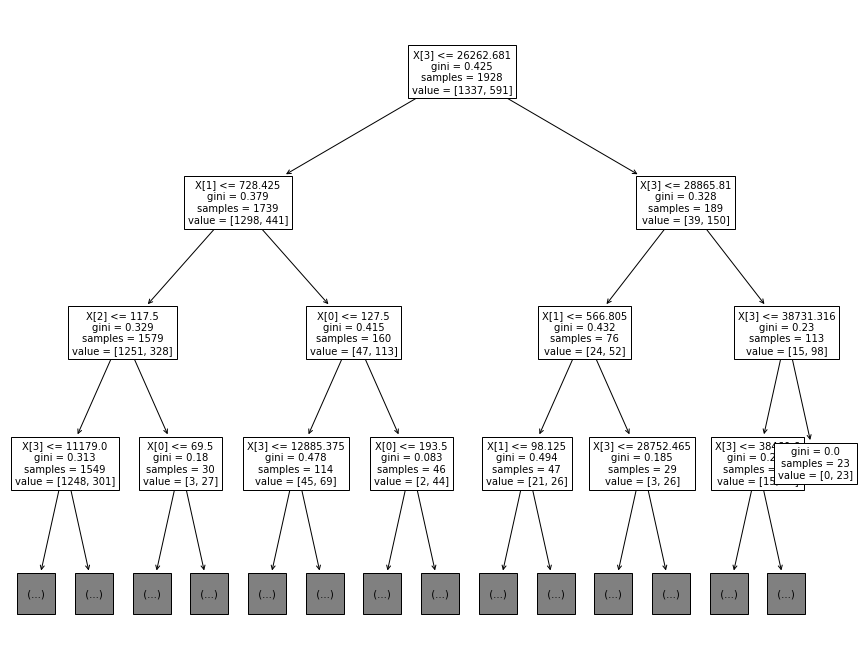

In [9]:
plt.figure(figsize=(15,12))
tree.plot_tree(best_model_dt, max_depth=3, fontsize=10);
plt.show()

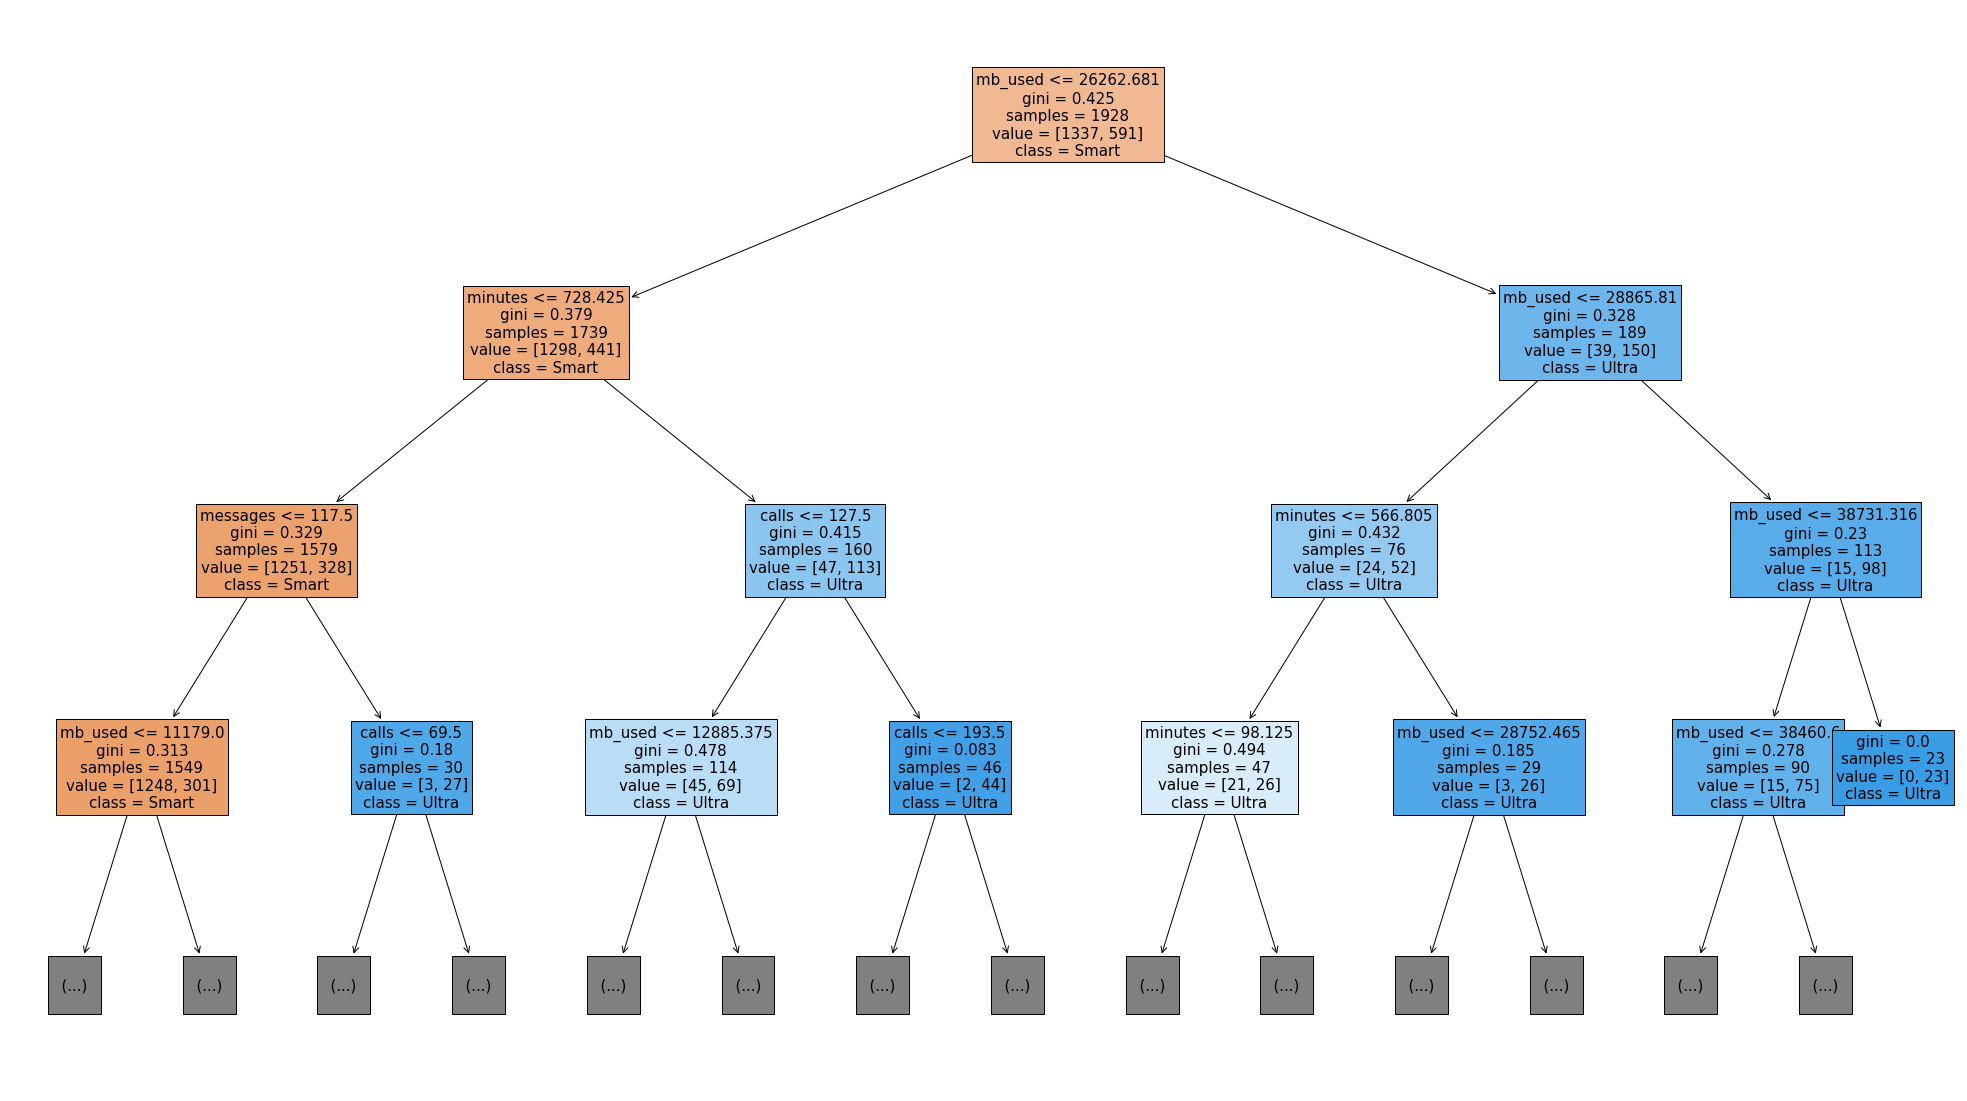

In [10]:
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_model_dt, 
               feature_names=features.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15,
               max_depth = 3     # Это чтобы прорисовывало 3 уровня, не глубже
                  )

**Применим случайный лес.**

In [11]:
best_model_rf = None
best_result_rf = 0
for est in range(1, 11):
    # обучение модели с заданным количеством деревьев
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    # обучение модели на тренировочной выборке
    model.fit(features_train, target_train)
    # подсчёт качества модели на валидационной выборке
    result = model.score(features_valid, target_valid)
    if result > best_result_rf:
        # сохранение наилучшей модели
        best_model_rf = model
        # сохранение наилучшего значения метрики accuracy на валидационных данных
        best_result_rf = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)

Accuracy наилучшей модели на валидационной выборке: 0.7900466562986003


In [12]:
best_model_rf = None
best_result_rf = 0
for est in range(1, 11):
    for depth in range(1, 6):
        # обучение модели с заданным количеством деревьев и максимальной глубиной
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # обучение модели на тренировочной выборке
        model.fit(features_train, target_train)
        # подсчёт качества модели на валидационной выборке
        result = model.score(features_valid, target_valid)
        if result > best_result_rf:
            # сохранение наилучшей модели
            best_model_rf = model
            # сохранение наилучших значений гиперпараметров и метрики accuracy на валидационных данных
            best_result_rf = result
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)
print("Наилучшие гиперпараметры: n_estimators =", best_est, "и max_depth =", best_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7962674961119751
Наилучшие гиперпараметры: n_estimators = 8 и max_depth = 5


In [13]:
%%time

best_model_rf = None
best_result_rf = 0
for est in range(1, 11):
    for depth in range(1, 6):
        # обучение модели с заданным количеством деревьев и максимальной глубиной
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        # обучение модели на тренировочной выборке
        model.fit(features_train, target_train)
        # подсчёт качества модели на валидационной выборке
        result = model.score(features_valid, target_valid)
        if result > best_result_rf:
            # сохранение наилучшей модели
            best_model_rf = model
            # сохранение наилучших значений гиперпараметров и метрики accuracy на валидационных данных
            best_result_rf = result
            best_est = est
            best_depth = depth
            
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)
print("Наилучшие гиперпараметры: n_estimators =", best_est, "и max_depth =", best_depth)
print()

Accuracy наилучшей модели на валидационной выборке: 0.7962674961119751
Наилучшие гиперпараметры: n_estimators = 8 и max_depth = 5

CPU times: user 660 ms, sys: 8.4 ms, total: 668 ms
Wall time: 676 ms


In [14]:
from tqdm import tqdm

for n_estimators in tqdm(range(3,58)):
    best_model_rf = None
    best_result_rf = 0
    for est in range(1, 11):
        for depth in range(1, 6):
            # обучение модели с заданным количеством деревьев и максимальной глубиной
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
            # обучение модели на тренировочной выборке
            model.fit(features_train, target_train)
            # подсчёт качества модели на валидационной выборке
            result = model.score(features_valid, target_valid)
            if result > best_result_rf:
                # сохранение наилучшей модели
                best_model_rf = model
                # сохранение наилучших значений гиперпараметров и метрики accuracy на валидационных данных
                best_result_rf = result
                best_est = est
                best_depth = depth
                
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)
print("Наилучшие гиперпараметры: n_estimators =", best_est, "и max_depth =", best_depth)
print()

100%|██████████| 55/55 [00:37<00:00,  1.48it/s]

Accuracy наилучшей модели на валидационной выборке: 0.7962674961119751
Наилучшие гиперпараметры: n_estimators = 8 и max_depth = 5



**Применим логистическую регрессию**

In [15]:
best_model_lr = None
best_result_lr = 0
for iter_ in range(800, 1000):
    # обучение модели с заданным количеством итераций
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter_)
    # обучение модели на тренировочной выборке
    model.fit(features_train, target_train)
    # предскажем на валидационных данных
    model.predict(features_valid)
    # подсчёт качества модели на валидационной выборке
    result = model.score(features_valid, target_valid)
    if result > best_result_lr:
        # сохранение наилучшей модели
        best_model_lr = model
        # сохранение наилучшего значения метрики accuracy на валидационных данных
        best_result_lr = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result_lr)

Accuracy наилучшей модели на валидационной выборке: 0.6998444790046656


**Вывод:** из всех моделей наилучший результат на валидационной выборке показала модель - Случайный Лес.

## Проверьте модель на тестовой выборке

**Случайный лес**

In [16]:
# оценка лучшей модели на тестовом наборе
test_predictions_rf = best_model_rf.predict(features_test)
test_result_rf = accuracy_score(target_test, test_predictions_rf)

print("Accuracy лучшей модели на валидационной выборке:", best_result_rf)
print("Accuracy лучшей модели на тестовой выборке:", test_result_rf)
print("Наилучшая модель на валидационной выборке:", best_model_rf)

Accuracy лучшей модели на валидационной выборке: 0.7962674961119751
Accuracy лучшей модели на тестовой выборке: 0.80248833592535
Наилучшая модель на валидационной выборке: RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345)


In [17]:
# best_model_rf — это модель с выбранными гиперпараметрами, просто подгоним модель к 
# комбинированным обучающим и валидационным наборам, а затем оценим ее производительность на тестовом наборе.

# Объединим обучающий и валидационный наборы
features_train_val = np.concatenate((features_train, features_valid))
target_train_val = np.concatenate((target_train, target_valid))

# Подгонка модели к комбинированным обучающим и валидационным наборам
best_model_rf.fit(features_train_val, target_train_val)

# Оценим переобученную модель на тестовом наборе
test_predictions_rf = best_model_rf.predict(features_test)
test_result_rf = accuracy_score(target_test, test_predictions_rf)

print("Accuracy лучшей модели на валидационной выборке:", best_result_rf)
print("Accuracy лучшей модели на тестовой выборке:", test_result_rf)
print("Наилучшая модель на валидационной выборке:", best_model_rf)

Accuracy лучшей модели на валидационной выборке: 0.7962674961119751
Accuracy лучшей модели на тестовой выборке: 0.8118195956454122
Наилучшая модель на валидационной выборке: RandomForestClassifier(max_depth=5, n_estimators=8, random_state=12345)


**Вывод:** модель случайный лес, продемонстрировала наилучший результат на тестовой выборке (0.81), а логистическая регрессия на обоих выборках показала наихудший результат. Выбираем модель случайный лес!

## (бонус) Проверьте модели на адекватность

In [18]:
# Поделим значения столбца с целевым признаком, содержащую количество уникальных значений на длину датафрейма и 
# сравним с качеством модели
data['is_ultra'].value_counts() / data.shape[0]

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

**Вывод:** т.к. построенная модель по качеству была лучше этого результата, то она вполне адекватна.

In [19]:
# создаем фиктивный классификатор, который всегда предсказывает класс большинства
dummy_model = DummyClassifier(strategy='constant', constant=0)

# подгоняем фиктивную модель к обучающим данным
dummy_model.fit(features_train, target_train)

# делаем прогнозы на тестовых данных
y_pred = dummy_model.predict(features_test)

# рассчитываем точность фиктивной модели
accuracy = accuracy_score(target_test, y_pred)

print("Точность фиктивной модели:", accuracy)

Точность фиктивной модели: 0.6936236391912908


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
